# Clustering whisky distilleries according to tasting Profiles

Use K-Means clustering to cluster whisky distilleries by their tasting profile. Use the elbow or silhouette method to find the optimal number of clusters.

To see how successful clustering was, report relevant metrics (e.g. silhouette, adjusted rand index, etc.) and create a plot showing the different distilleries, their classes according to the k-Means clustering, and the distance between points. You can use sklearn.manifold to get Euclidean distances between points.

Describe the main differences between the cluster - what are the factors that differ between classes?

# We will first import libraries necessary to start clustering

In [1]:
get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import sklearn.manifold
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

We will now import the dataset and have a look at the first five rows so as to see the column names.

In [2]:
whisky_data = pd.read_csv('whisky.csv')

In [16]:
whisky_data

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,82,Tobermory,1,1,1,0,0,1,0,0,1,2,2,2,PA75 6NR,150450,755070
82,83,Tomatin,2,3,2,0,0,2,2,1,1,2,0,1,IV13 7YT,279120,829630
83,84,Tomintoul,0,3,1,0,0,2,2,1,1,2,1,2,AB37 9AQ,315100,825560
84,85,Tormore,2,2,1,0,0,1,0,1,2,1,0,0,PH26 3LR,315180,834960


We would like to cluster whisky distilleries by their tasting profile, but there are some rows that are not necessary in determining this, namely:

RowID, Postcode, Latitude, Longitude

Therefore we will remove these columns and leave the necessary columns.

In [4]:
whisky_dist = whisky_data.drop(['RowID', 'Latitude', 'Postcode', 'Longitude'], axis=1)

In [5]:
whisky_dist.describe()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,2.069767,2.290698,1.534884,0.546512,0.116279,1.244186,1.383721,0.976744,1.465116,1.802326,1.802326,1.697674
std,0.930410,0.717287,0.863613,0.990032,0.322439,0.853175,0.784686,0.932760,0.821730,0.629094,0.779438,0.855017
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000
75%,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000
max,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000


In [6]:
whisky_dist.head()

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2
1,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2
2,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2
3,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0
4,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1


In [7]:
whisky_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Distillery  86 non-null     object
 1   Body        86 non-null     int64 
 2   Sweetness   86 non-null     int64 
 3   Smoky       86 non-null     int64 
 4   Medicinal   86 non-null     int64 
 5   Tobacco     86 non-null     int64 
 6   Honey       86 non-null     int64 
 7   Spicy       86 non-null     int64 
 8   Winey       86 non-null     int64 
 9   Nutty       86 non-null     int64 
 10  Malty       86 non-null     int64 
 11  Fruity      86 non-null     int64 
 12  Floral      86 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 8.9+ KB


From the above information we can see that there are eighty six rows and thirteen columns on the new dataframe. The distillery column's type is object. All the columns have the same number of entries and there are no missing values.

In [8]:
whisky_dist.nunique()

Distillery    86
Body           5
Sweetness      4
Smoky          5
Medicinal      5
Tobacco        2
Honey          5
Spicy          4
Winey          5
Nutty          5
Malty          4
Fruity         4
Floral         5
dtype: int64

In [9]:
whisky_dist['Distillery'].isnull().any()

False

The above is just to actually check if there are any missing values.

In [56]:
X = np.array(whisky_dist.drop(['Distillery'],1))

In [57]:
y = np.array(whisky_dist['Distillery'])

Above we have split the data into the x and y

In [65]:
# whisky_dist['Distillery'] = pd.Categorical(whisky_dist['Distillery'])

whisky_dist['Distillery'] which is an object has been changed to categorical data. By commenting out the changing of the datatype, we ran the note book and saw that there is no difference therefore the change is insignificant.

In [69]:
kmeans.inertia_

259.4595238095238

Above, we now evaluate how well the formed clusters are. To do that, we will calculate the inertia of the clusters

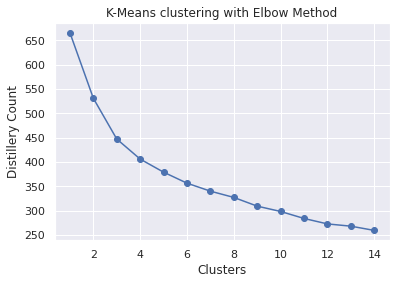

In [68]:
wcss = []
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++', max_iter=100, n_init=14, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the dataframe results by using the elbow method
plt.plot(range(1,15),wcss, marker='o')
plt.title('K-Means clustering with Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Distillery Count')
plt.show()